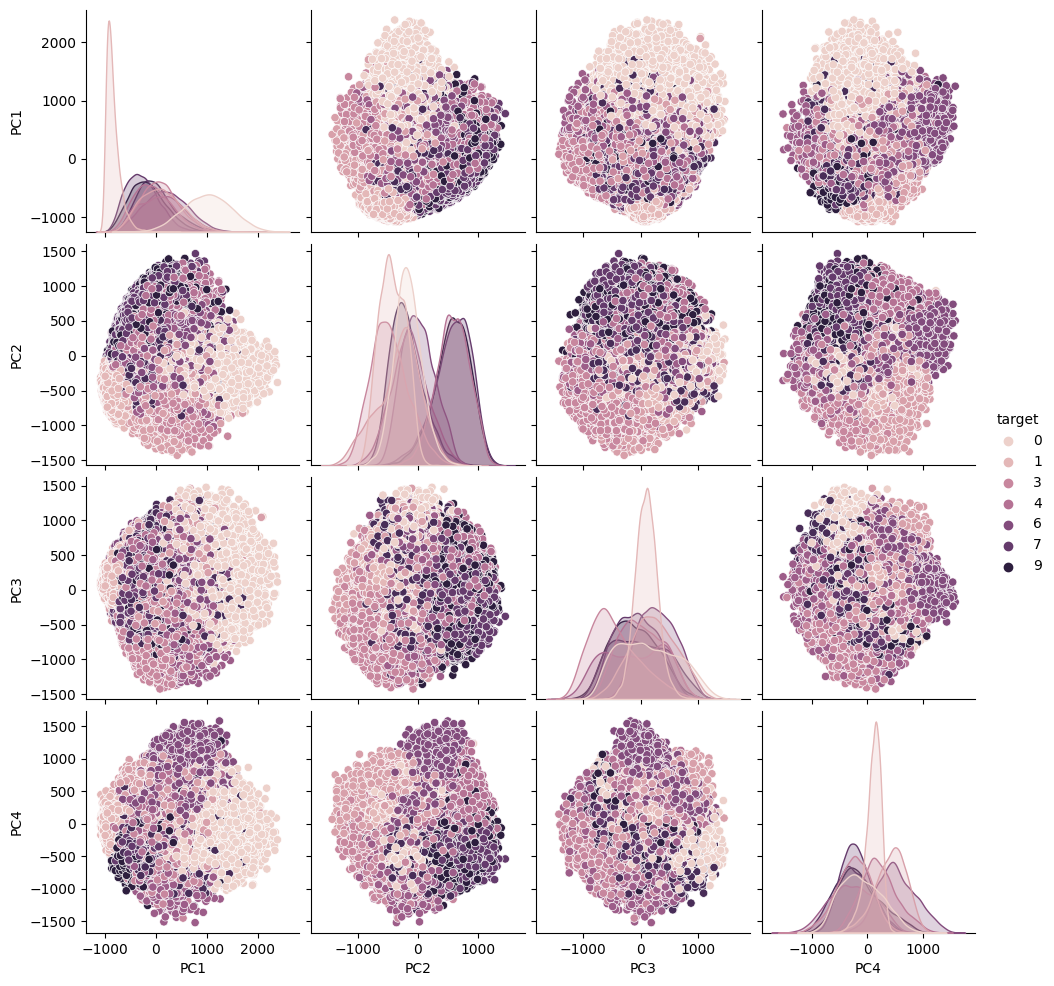

Accuracy on Training Dataset: 0.56
Accuracy on Test Dataset: 0.56


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Extract the data and target (labels)
data = mnist.data
target = mnist.target.astype(int)

# Apply PCA with 4 components
n_components = 4
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data)

# Create a DataFrame for the PCA-transformed data
pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Concatenate the PCA data with the target labels
pca_df['target'] = target

# 3.1. Create a pairplot for the PCA-transformed data
sns.pairplot(pca_df, hue='target')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_pca, target, test_size=0.2, random_state=42)

# 3.2. Perform Gaussian Naive Bayes classification
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on the training and test data
train_predictions = gnb.predict(X_train)
test_predictions = gnb.predict(X_test)

# Calculate and report accuracy for the training and test datasets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Accuracy on Training Dataset: {train_accuracy:.2f}")
print(f"Accuracy on Test Dataset: {test_accuracy:.2f}")
